<a href="https://colab.research.google.com/github/Sai-krishna-33/CODSOFT/blob/main/movie_genre_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLTK data download complete.
Creating a dummy dataset for demonstration purposes.

--- Dataset Head ---
   ID            TITLE                    GENRE  \
0   1  The Dark Knight       Action|Crime|Drama   
1   2     Forrest Gump            Drama|Romance   
2   3        Toy Story  Animation|Comedy|Family   
3   4        Inception   Action|Sci-Fi|Thriller   
4   5     Pulp Fiction              Crime|Drama   

                                         DESCRIPTION  
0  A criminal mastermind known as the Joker terro...  
1  The presidencies of Kennedy and Johnson, the V...  
2  A cowboy doll is profoundly threatened and jea...  
3  A thief who steals corporate secrets through u...  
4  The lives of two mob hitmen, a boxer, a gangst...  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10 non-null     int64 
 1   TITLE   

/tmp/ipython-input-2-2621930552.py:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DESCRIPTION'].fillna("", inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


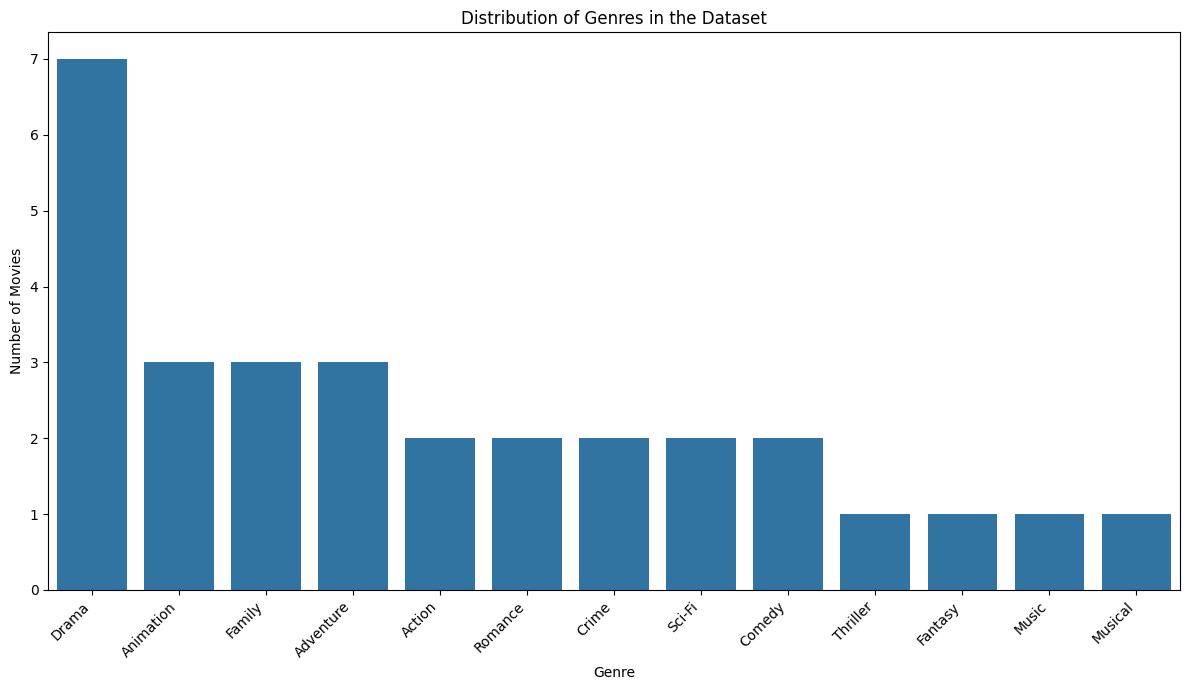

In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Download necessary NLTK data (run once) ---
print("Downloading NLTK data (if not already downloaded)...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
print("NLTK data download complete.")

# --- 2. Load and Inspect Dataset ---
# --- Option 1: Load a standard CSV (replace 'movie_genre_dataset.csv' with your file) ---
# Example: df = pd.read_csv('your_movie_data.csv')
# Make sure your CSV has 'GENRE' (e.g., 'Action|Drama') and 'DESCRIPTION' columns.

# --- Option 2: Load a dataset like 'train_data.txt' from Kaggle (common format) ---
# train_path = 'path/to/your/train_data.txt' # e.g., 'Genre Classification Dataset/train_data.txt'
# try:
#     df = pd.read_csv(train_path, sep=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
#     print(f"Dataset loaded from: {train_path}")
# except FileNotFoundError:
#     print(f"File not found at {train_path}. Trying a generic CSV path.")
#     try:
#         df = pd.read_csv('movie_genre_dataset.csv')
#         print("Loaded 'movie_genre_dataset.csv'.")
#     except FileNotFoundError:
#         print("Neither specified path nor 'movie_genre_dataset.csv' found.")
#         print("Creating a dummy dataset for demonstration purposes.")
#         # Create a dummy dataset if not found
#         data = {
#             'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#             'TITLE': [
#                 'The Dark Knight', 'Forrest Gump', 'Toy Story', 'Inception', 'Pulp Fiction',
#                 'Spirited Away', 'The Shawshank Redemption', 'La La Land', 'Interstellar', 'The Lion King'
#             ],
#             'GENRE': [
#                 'Action|Crime|Drama', 'Drama|Romance', 'Animation|Comedy|Family',
#                 'Action|Sci-Fi|Thriller', 'Crime|Drama', 'Animation|Adventure|Family|Fantasy',
#                 'Drama', 'Comedy|Drama|Music|Romance', 'Adventure|Drama|Sci-Fi', 'Animation|Adventure|Drama|Family|Musical'
#             ],
#             'DESCRIPTION': [
#                 'A criminal mastermind known as the Joker terrorizes Gotham City, leading Batman to confront his greatest psychological and physical challenges.',
#                 'The presidencies of Kennedy and Johnson, the Vietnam War, Watergate, and other historical events unfold from the perspective of an Alabama man with an IQ of 75.',
#                 'A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy\'s room.',
#                 'A thief who steals corporate secrets through use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.',
#                 'The lives of two mob hitmen, a boxer, a gangster\'s wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
#                 'During her family\'s move to the suburbs, a sullen 10-year-old girl wanders into a world ruled by gods, witches, and spirits, and where humans are changed into beasts.',
#                 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
#                 'While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.',
#                 'A team of explorers travel through a wormhole in space in an attempt to ensure humanity\'s survival.',
#                 'Lion cub and future king Simba searches for his identity. His mischievous uncle Scar plots to usurp Mufasa\'s place on the throne.'
#             ]
#         }
#         df = pd.DataFrame(data)
#         print("Using a dummy dataset for demonstration.")

# For simplicity, let's use the dummy dataset directly for this combined code
print("Creating a dummy dataset for demonstration purposes.")
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TITLE': [
        'The Dark Knight', 'Forrest Gump', 'Toy Story', 'Inception', 'Pulp Fiction',
        'Spirited Away', 'The Shawshank Redemption', 'La La Land', 'Interstellar', 'The Lion King'
    ],
    'GENRE': [
        'Action|Crime|Drama', 'Drama|Romance', 'Animation|Comedy|Family',
        'Action|Sci-Fi|Thriller', 'Crime|Drama', 'Animation|Adventure|Family|Fantasy',
        'Drama', 'Comedy|Drama|Music|Romance', 'Adventure|Drama|Sci-Fi', 'Animation|Adventure|Drama|Family|Musical'
    ],
    'DESCRIPTION': [
        'A criminal mastermind known as the Joker terrorizes Gotham City, leading Batman to confront his greatest psychological and physical challenges.',
        'The presidencies of Kennedy and Johnson, the Vietnam War, Watergate, and other historical events unfold from the perspective of an Alabama man with an IQ of 75.',
        'A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy\'s room.',
        'A thief who steals corporate secrets through use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.',
        'The lives of two mob hitmen, a boxer, a gangster\'s wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
        'During her family\'s move to the suburbs, a sullen 10-year-old girl wanders into a world ruled by gods, witches, and spirits, and where humans are changed into beasts.',
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.',
        'A team of explorers travel through a wormhole in space in an attempt to ensure humanity\'s survival.',
        'Lion cub and future king Simba searches for his identity. His mischievous uncle Scar plots to usurp Mufasa\'s place on the throne.'
    ]
}
df = pd.DataFrame(data)


print("\n--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Missing values before processing ---")
print(df.isnull().sum())

# --- 3. Data Preprocessing ---

# Handle missing descriptions (if any)
df['DESCRIPTION'].fillna("", inplace=True)

# Define text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    tokens = nltk.word_tokenize(text) # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Remove stopwords and lemmatize
    return ' '.join(tokens)

print("\n--- Cleaning text descriptions ---")
df['CLEANED_DESCRIPTION'] = df['DESCRIPTION'].apply(clean_text)
print("Text cleaning complete.")

# Multi-label binarization for genres
if 'GENRE' in df.columns:
    print("\n--- Processing genres (Multi-label Binarization) ---")
    df['GENRE_LIST'] = df['GENRE'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
    mlb = MultiLabelBinarizer()
    genre_labels = mlb.fit_transform(df['GENRE_LIST'])
    genre_columns = mlb.classes_
    df_genres = pd.DataFrame(genre_labels, columns=genre_columns, index=df.index)
    df = pd.concat([df, df_genres], axis=1) # Add binarized genres back to the dataframe
    print("Genre processing complete.")
    print("\nFirst 5 rows with binarized genres:")
    print(df[['DESCRIPTION', 'CLEANED_DESCRIPTION'] + list(genre_columns)].head())
else:
    print("\nWarning: 'GENRE' column not found for multi-label binarization. Cannot proceed with genre classification.")
    # Exit is removed to allow the rest of the code to run if the user provides a dataset later
    # exit() # Exit if no genre data to train on


# --- 4. Feature Extraction (TF-IDF Vectorization) ---
# Check if genre data exists before proceeding with training
if 'GENRE' in df.columns and not df['GENRE'].isnull().all():
    X = df['CLEANED_DESCRIPTION']
    y = genre_labels # Use the binarized labels

    print("\n--- Splitting data into training and testing sets ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training set size: {len(X_train)} samples")
    print(f"Testing set size: {len(X_test)} samples")

    print("\n--- Performing TF-IDF Vectorization ---")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features based on dataset size and complexity
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
    print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

    # --- 5. Model Building and Training (Multi-label Classification) ---
    print("\n--- Training the OneVsRestClassifier with Logistic Regression ---")
    logistic_reg = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    classifier = OneVsRestClassifier(logistic_reg)

    classifier.fit(X_train_tfidf, y_train)
    print("Model training complete.")

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_tfidf)
    y_pred_proba = classifier.predict_proba(X_test_tfidf) # Probabilities are useful for multi-label

    # --- 6. Model Evaluation ---
    print("\n--- Model Evaluation Results ---")
    # Check if y_test is not empty before calculating metrics
    if y_test.shape[0] > 0:
        print(f"Accuracy (Hamming Loss based): {accuracy_score(y_test, y_pred):.4f}") # This is subset accuracy for multi-label
        print(f"Micro F1 Score: {f1_score(y_test, y_pred, average='micro'):.4f}")
        print(f"Macro F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
        print(f"Precision Score (Micro): {precision_score(y_test, y_pred, average='micro', zero_division=0):.4f}")
        print(f"Recall Score (Micro): {recall_score(y_test, y_pred, average='micro', zero_division=0):.4f}")

        # Detailed classification report
        print("\n--- Classification Report (per genre) ---")
        # Ensure genre_columns are passed correctly to target_names
        print(classification_report(y_test, y_pred, target_names=genre_columns, zero_division=0))
    else:
        print("Skipping model evaluation as the test set is empty.")

    # --- 7. Make Predictions on New Data ---
    print("\n--- Testing with New Movie Descriptions ---")

    def predict_genre(description_text, model, vectorizer, mlb_encoder, threshold=0.2):
        """
        Predicts genres for a given movie description.

        Args:
            description_text (str): The plot summary or description of the movie.
            model: The trained OneVsRestClassifier model.
            vectorizer: The fitted TF-IDF Vectorizer.
            mlb_encoder: The fitted MultiLabelBinarizer.
            threshold (float): Probability threshold to consider a genre present.

        Returns:
            list: A list of predicted genres.
        """
        cleaned_desc = clean_text(description_text)
        vectorized_desc = vectorizer.transform([cleaned_desc])
        predictions_proba = model.predict_proba(vectorized_desc)[0]

        # Get genres where probability is above threshold
        predicted_genres_indices = np.where(predictions_proba >= threshold)[0]
        predicted_genres = mlb_encoder.classes_[predicted_genres_indices]

        if len(predicted_genres) == 0:
            # If no genre meets the threshold, pick the one with the highest probability
            highest_proba_index = np.argmax(predictions_proba)
            predicted_genres = [mlb_encoder.classes_[highest_proba_index]]
            print(f"  No genre met the threshold ({threshold:.2f}). Predicting the top genre: '{predicted_genres[0]}' (probability: {predictions_proba[highest_proba_index]:.2f})")

        return list(predicted_genres)

    # Test with various new movie descriptions
    test_descriptions = [
        "A young wizard discovers his magical heritage and battles a dark lord to save the world.",
        "A hilarious journey of a group of friends on a crazy road trip leading to unexpected adventures.",
        "A detective hunts down a serial killer terrorizing the city, leading to a thrilling climax.",
        "A heartwarming story of a family overcoming adversity in a small town.",
        "Humans colonize Mars after Earth becomes uninhabitable, facing new challenges and discoveries."
    ]

    for i, desc in enumerate(test_descriptions):
        print(f"\nMovie Description {i+1}: \"{desc}\"")
        predicted_genres = predict_genre(desc, classifier, tfidf_vectorizer, mlb, threshold=0.2)
        print(f"  Predicted Genres: {predicted_genres}")

    # --- Optional: Visualize Genre Distribution ---
    # This part is useful if you have a larger dataset to see genre prevalence
    if 'GENRE_LIST' in df.columns:
        all_genres = [genre for sublist in df['GENRE_LIST'] for genre in sublist]
        if all_genres: # Check if all_genres is not empty
            genre_counts = pd.Series(all_genres).value_counts()

            plt.figure(figsize=(12, 7))
            sns.barplot(x=genre_counts.index, y=genre_counts.values)
            plt.xticks(rotation=45, ha='right')
            plt.title('Distribution of Genres in the Dataset')
            plt.xlabel('Genre')
            plt.ylabel('Number of Movies')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo genres found in the dataset for visualization.")
else:
    print("\nSkipping model training, evaluation, and prediction as no genre data is available.")

In [ ]:
import nltk

print("Downloading NLTK data (if not already downloaded)...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
print("NLTK data download complete.")

NLTK data download complete.


NLTK data download complete.
Creating a dummy dataset for demonstration purposes.

--- Dataset Head ---
   ID            TITLE                    GENRE  \
0   1  The Dark Knight       Action|Crime|Drama   
1   2     Forrest Gump            Drama|Romance   
2   3        Toy Story  Animation|Comedy|Family   
3   4        Inception   Action|Sci-Fi|Thriller   
4   5     Pulp Fiction              Crime|Drama   

                                         DESCRIPTION  
0  A criminal mastermind known as the Joker terro...  
1  The presidencies of Kennedy and Johnson, the V...  
2  A cowboy doll is profoundly threatened and jea...  
3  A thief who steals corporate secrets through u...  
4  The lives of two mob hitmen, a boxer, a gangst...  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10 non-null     int64 
 1   TITLE   

/tmp/ipython-input-1-3967796818.py:110: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DESCRIPTION'].fillna("", inplace=True)


Text cleaning complete.

--- Processing genres (Multi-label Binarization) ---
Genre processing complete.

First 5 rows with binarized genres:
                                         DESCRIPTION  \
0  A criminal mastermind known as the Joker terro...   
1  The presidencies of Kennedy and Johnson, the V...   
2  A cowboy doll is profoundly threatened and jea...   
3  A thief who steals corporate secrets through u...   
4  The lives of two mob hitmen, a boxer, a gangst...   

                                 CLEANED_DESCRIPTION  Action  Adventure  \
0  criminal mastermind known joker terrorizes got...       1          0   
1  presidency kennedy johnson vietnam war waterga...       0          0   
2  cowboy doll profoundly threatened jealous new ...       0          0   
3  thief steal corporate secret use dreamsharing ...       1          0   
4  life two mob hitman boxer gangster wife pair d...       0          0   

   Animation  Comedy  Crime  Drama  Family  Fantasy  Music  Musical  R

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


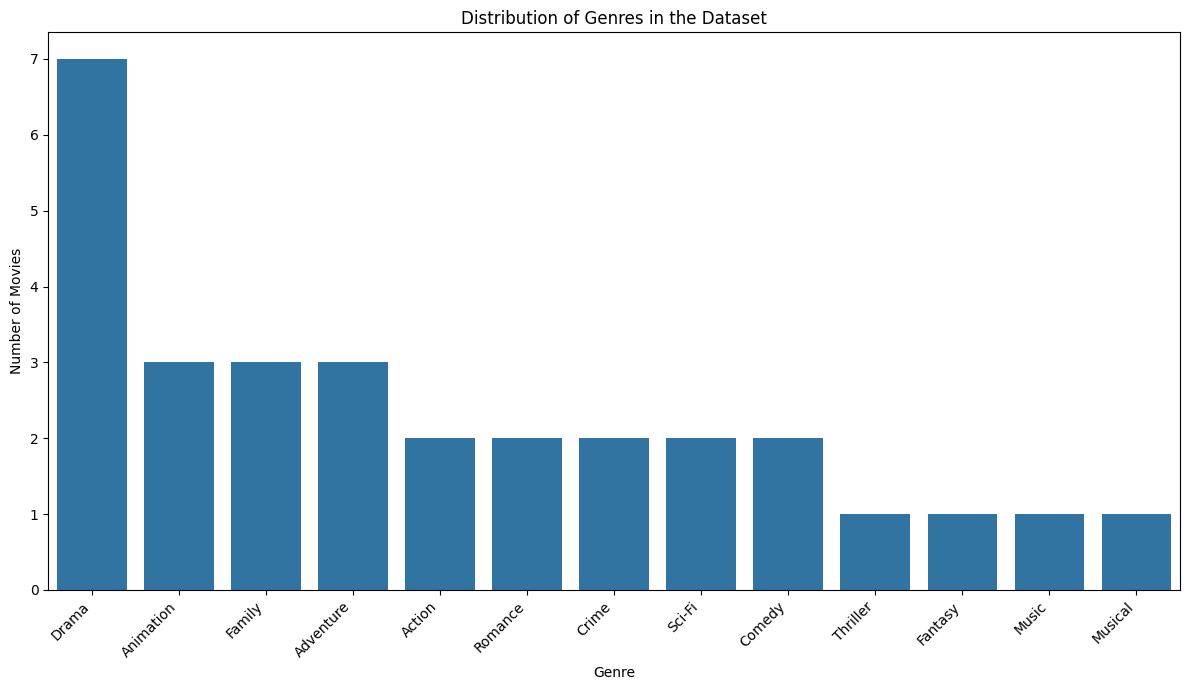

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Download necessary NLTK data (run once) ---
print("Downloading NLTK data (if not already downloaded)...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added punkt_tab download
print("NLTK data download complete.")

# --- 2. Load and Inspect Dataset ---
# --- Option 1: Load a standard CSV (replace 'movie_genre_dataset.csv' with your file) ---
# Example: df = pd.read_csv('your_movie_data.csv')
# Make sure your CSV has 'GENRE' (e.g., 'Action|Drama') and 'DESCRIPTION' columns.

# --- Option 2: Load a dataset like 'train_data.txt' from Kaggle (common format) ---
# train_path = 'path/to/your/train_data.txt' # e.g., 'Genre Classification Dataset/train_data.txt'
# try:
#     df = pd.read_csv(train_path, sep=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
#     print(f"Dataset loaded from: {train_path}")
# except FileNotFoundError:
#     print(f"File not found at {train_path}. Trying a generic CSV path.")
#     try:
#         df = pd.read_csv('movie_genre_dataset.csv')
#         print("Loaded 'movie_genre_dataset.csv'.")
#     except FileNotFoundError:
#         print("Neither specified path nor 'movie_genre_dataset.csv' found.")
#         print("Creating a dummy dataset for demonstration purposes.")
#         # Create a dummy dataset if not found
#         data = {
#             'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#             'TITLE': [
#                 'The Dark Knight', 'Forrest Gump', 'Toy Story', 'Inception', 'Pulp Fiction',
#                 'Spirited Away', 'The Shawshank Redemption', 'La La Land', 'Interstellar', 'The Lion King'
#             ],
#             'GENRE': [
#                 'Action|Crime|Drama', 'Drama|Romance', 'Animation|Comedy|Family',
#                 'Action|Sci-Fi|Thriller', 'Crime|Drama', 'Animation|Adventure|Family|Fantasy',
#                 'Drama', 'Comedy|Drama|Music|Romance', 'Adventure|Drama|Sci-Fi', 'Animation|Adventure|Drama|Family|Musical'
#             ],
#             'DESCRIPTION': [
#                 'A criminal mastermind known as the Joker terrorizes Gotham City, leading Batman to confront his greatest psychological and physical challenges.',
#                 'The presidencies of Kennedy and Johnson, the Vietnam War, Watergate, and other historical events unfold from the perspective of an Alabama man with an IQ of 75.',
#                 'A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy\'s room.',
#                 'A thief who steals corporate secrets through use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.',
#                 'The lives of two mob hitmen, a boxer, a gangster\'s wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
#                 'During her family\'s move to the suburbs, a sullen 10-year-old girl wanders into a world ruled by gods, witches, and spirits, and where humans are changed into beasts.',
#                 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
#                 'While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.',
#                 'A team of explorers travel through a wormhole in space in an attempt to ensure humanity\'s survival.',
#                 'Lion cub and future king Simba searches for his identity. His mischievous uncle Scar plots to usurp Mufasa\'s place on the throne.'
#             ]
#         }
#         df = pd.DataFrame(data)
#         print("Using a dummy dataset for demonstration.")

# For simplicity, let's use the dummy dataset directly for this combined code
print("Creating a dummy dataset for demonstration purposes.")
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TITLE': [
        'The Dark Knight', 'Forrest Gump', 'Toy Story', 'Inception', 'Pulp Fiction',
        'Spirited Away', 'The Shawshank Redemption', 'La La Land', 'Interstellar', 'The Lion King'
    ],
    'GENRE': [
        'Action|Crime|Drama', 'Drama|Romance', 'Animation|Comedy|Family',
        'Action|Sci-Fi|Thriller', 'Crime|Drama', 'Animation|Adventure|Family|Fantasy',
        'Drama', 'Comedy|Drama|Music|Romance', 'Adventure|Drama|Sci-Fi', 'Animation|Adventure|Drama|Family|Musical'
    ],
    'DESCRIPTION': [
        'A criminal mastermind known as the Joker terrorizes Gotham City, leading Batman to confront his greatest psychological and physical challenges.',
        'The presidencies of Kennedy and Johnson, the Vietnam War, Watergate, and other historical events unfold from the perspective of an Alabama man with an IQ of 75.',
        'A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy\'s room.',
        'A thief who steals corporate secrets through use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.',
        'The lives of two mob hitmen, a boxer, a gangster\'s wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
        'During her family\'s move to the suburbs, a sullen 10-year-old girl wanders into a world ruled by gods, witches, and spirits, and where humans are changed into beasts.',
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.',
        'A team of explorers travel through a wormhole in space in an attempt to ensure humanity\'s survival.',
        'Lion cub and future king Simba searches for his identity. His mischievous uncle Scar plots to usurp Mufasa\'s place on the throne.'
    ]
}
df = pd.DataFrame(data)


print("\n--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Missing values before processing ---")
print(df.isnull().sum())

# --- 3. Data Preprocessing ---

# Handle missing descriptions (if any)
df['DESCRIPTION'].fillna("", inplace=True)

# Define text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    tokens = nltk.word_tokenize(text) # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Remove stopwords and lemmatize
    return ' '.join(tokens)

print("\n--- Cleaning text descriptions ---")
df['CLEANED_DESCRIPTION'] = df['DESCRIPTION'].apply(clean_text)
print("Text cleaning complete.")

# Multi-label binarization for genres
if 'GENRE' in df.columns:
    print("\n--- Processing genres (Multi-label Binarization) ---")
    df['GENRE_LIST'] = df['GENRE'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
    mlb = MultiLabelBinarizer()
    genre_labels = mlb.fit_transform(df['GENRE_LIST'])
    genre_columns = mlb.classes_
    df_genres = pd.DataFrame(genre_labels, columns=genre_columns, index=df.index)
    df = pd.concat([df, df_genres], axis=1) # Add binarized genres back to the dataframe
    print("Genre processing complete.")
    print("\nFirst 5 rows with binarized genres:")
    print(df[['DESCRIPTION', 'CLEANED_DESCRIPTION'] + list(genre_columns)].head())
else:
    print("\nWarning: 'GENRE' column not found for multi-label binarization. Cannot proceed with genre classification.")
    # Exit is removed to allow the rest of the code to run if the user provides a dataset later
    # exit() # Exit if no genre data to train on


# --- 4. Feature Extraction (TF-IDF Vectorization) ---
# Check if genre data exists before proceeding with training
if 'GENRE' in df.columns and not df['GENRE'].isnull().all():
    X = df['CLEANED_DESCRIPTION']
    y = genre_labels # Use the binarized labels

    print("\n--- Splitting data into training and testing sets ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training set size: {len(X_train)} samples")
    print(f"Testing set size: {len(X_test)} samples")

    print("\n--- Performing TF-IDF Vectorization ---")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features based on dataset size and complexity
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
    print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

    # --- 5. Model Building and Training (Multi-label Classification) ---
    print("\n--- Training the OneVsRestClassifier with Logistic Regression ---")
    logistic_reg = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    classifier = OneVsRestClassifier(logistic_reg)

    classifier.fit(X_train_tfidf, y_train)
    print("Model training complete.")

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_tfidf)
    y_pred_proba = classifier.predict_proba(X_test_tfidf) # Corrected to use X_test_tfidf for prediction probabilities


    # --- 6. Model Evaluation ---
    print("\n--- Model Evaluation Results ---")
    # Check if y_test is not empty before calculating metrics
    if y_test.shape[0] > 0:
        print(f"Accuracy (Hamming Loss based): {accuracy_score(y_test, y_pred):.4f}") # This is subset accuracy for multi-label
        print(f"Micro F1 Score: {f1_score(y_test, y_pred, average='micro'):.4f}")
        print(f"Macro F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
        print(f"Precision Score (Micro): {precision_score(y_test, y_pred, average='micro', zero_division=0):.4f}")
        print(f"Recall Score (Micro): {recall_score(y_test, y_pred, average='micro', zero_division=0):.4f}")

        # Detailed classification report
        print("\n--- Classification Report (per genre) ---")
        # Ensure genre_columns are passed correctly to target_names
        print(classification_report(y_test, y_pred, target_names=genre_columns, zero_division=0))
    else:
        print("Skipping model evaluation as the test set is empty.")

    # --- 7. Make Predictions on New Data ---
    print("\n--- Testing with New Movie Descriptions ---")

    def predict_genre(description_text, model, vectorizer, mlb_encoder, threshold=0.2):
        """
        Predicts genres for a given movie description.

        Args:
            description_text (str): The plot summary or description of the movie.
            model: The trained OneVsRestClassifier model.
            vectorizer: The fitted TF-IDF Vectorizer.
            mlb_encoder: The fitted MultiLabelBinarizer.
            threshold (float): Probability threshold to consider a genre present.

        Returns:
            list: A list of predicted genres.
        """
        cleaned_desc = clean_text(description_text)
        vectorized_desc = vectorizer.transform([cleaned_desc])
        predictions_proba = model.predict_proba(vectorized_desc)[0]

        # Get genres where probability is above threshold
        predicted_genres_indices = np.where(predictions_proba >= threshold)[0]
        predicted_genres = mlb_encoder.classes_[predicted_genres_indices]

        if len(predicted_genres) == 0:
            # If no genre meets the threshold, pick the one with the highest probability
            highest_proba_index = np.argmax(predictions_proba)
            predicted_genres = [mlb_encoder.classes_[highest_proba_index]]
            print(f"  No genre met the threshold ({threshold:.2f}). Predicting the top genre: '{predicted_genres[0]}' (probability: {predictions_proba[highest_proba_index]:.2f})")

        return list(predicted_genres)

    # Test with various new movie descriptions
    test_descriptions = [
        "A young wizard discovers his magical heritage and battles a dark lord to save the world.",
        "A hilarious journey of a group of friends on a crazy road trip leading to unexpected adventures.",
        "A detective hunts down a serial killer terrorizing the city, leading to a thrilling climax.",
        "A heartwarming story of a family overcoming adversity in a small town.",
        "Humans colonize Mars after Earth becomes uninhabitable, facing new challenges and discoveries."
    ]

    for i, desc in enumerate(test_descriptions):
        print(f"\nMovie Description {i+1}: \"{desc}\"")
        predicted_genres = predict_genre(desc, classifier, tfidf_vectorizer, mlb, threshold=0.2)
        print(f"  Predicted Genres: {predicted_genres}")

    # --- Optional: Visualize Genre Distribution ---
    # This part is useful if you have a larger dataset to see genre prevalence
    if 'GENRE_LIST' in df.columns:
        all_genres = [genre for sublist in df['GENRE_LIST'] for genre in sublist]
        if all_genres: # Check if all_genres is not empty
            genre_counts = pd.Series(all_genres).value_counts()

            plt.figure(figsize=(12, 7))
            sns.barplot(x=genre_counts.index, y=genre_counts.values)
            plt.xticks(rotation=45, ha='right')
            plt.title('Distribution of Genres in the Dataset')
            plt.xlabel('Genre')
            plt.ylabel('Number of Movies')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo genres found in the dataset for visualization.")
else:
    print("\nSkipping model training, evaluation, and prediction as no genre data is available.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')